In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2, style='whitegrid')
%matplotlib inline

In [78]:
df= pd.read_csv('diamonds.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Information about our data

In [49]:
#J is worst, D is best
print(df.color.unique())

#clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
print(df.clarity.unique())

#cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
print(df.cut.unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


## EDA of Dependent Variable and Categorical Features

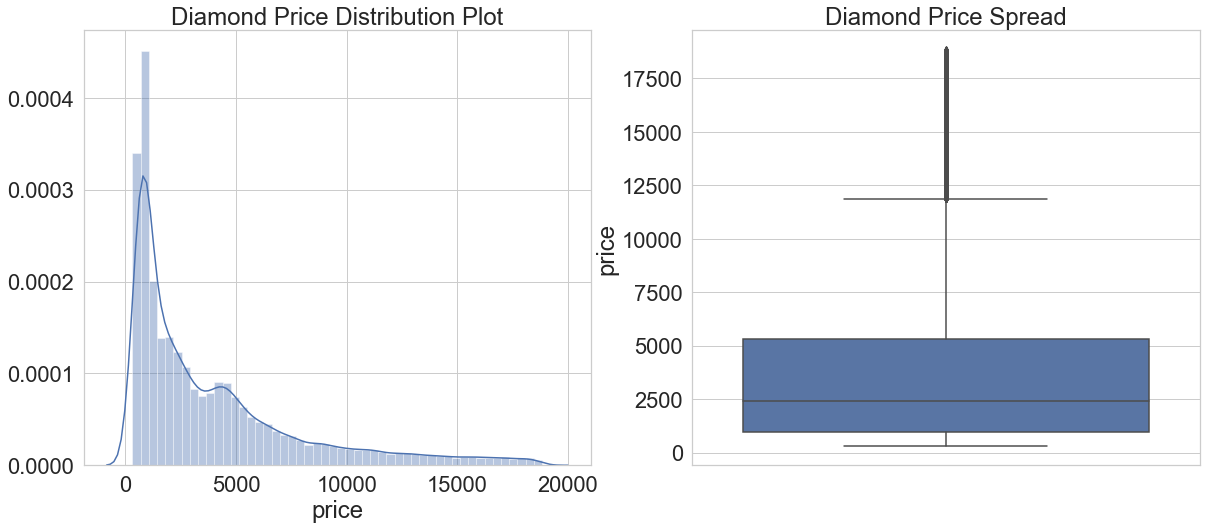

In [50]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Diamond Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Diamond Price Spread')
sns.boxplot(y=df.price)

plt.show()

*Inferences*:
- the price is right skewed
- most of the data is between 1000-5100 USD

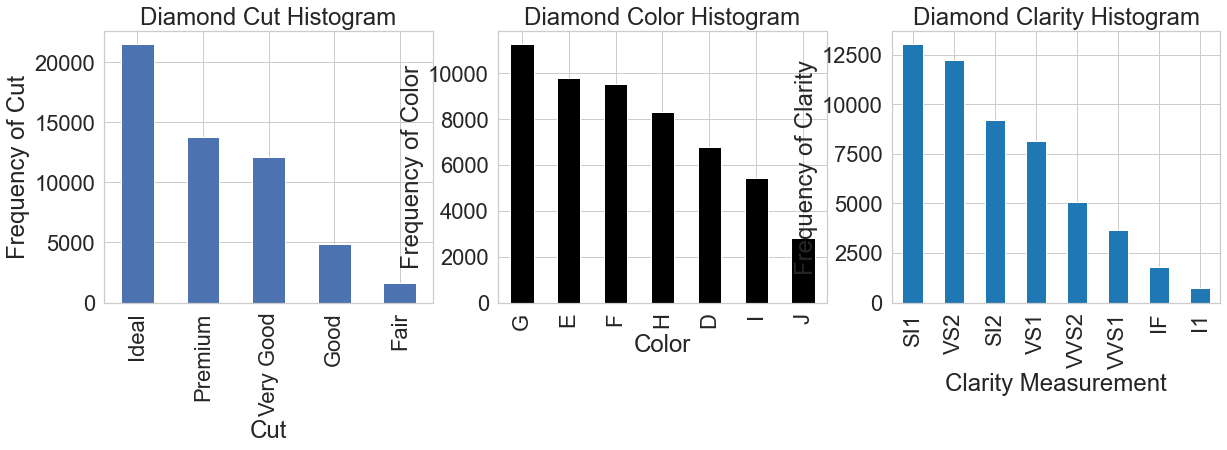

In [51]:
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
plt1 = df.cut.value_counts().plot(kind='bar')
plt.title('Diamond Cut Histogram')
plt1.set(xlabel = 'Cut', ylabel='Frequency of Cut')

plt.subplot(1,3,2)
plt1 = df.color.value_counts().plot(kind='bar', color='black')
plt.title('Diamond Color Histogram')
plt1.set(xlabel = 'Color', ylabel='Frequency of Color')


plt.subplot(1,3,3)
plt1 = df.clarity.value_counts().plot(kind='bar', color='tab:blue')
plt.title('Diamond Clarity Histogram')
plt1.set(xlabel = 'Clarity Measurement', ylabel='Frequency of Clarity')


plt.show()

## Plotting Correlation and Dropping Highly Correlated Variables

In [52]:
data_pred = df.drop(columns='price')

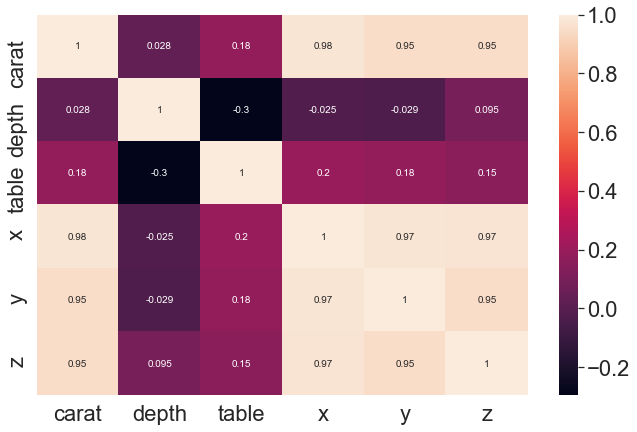

In [53]:
# which variables are highly correlated that need to be removed?
plt.figure(figsize=(11,7))
sns.heatmap(data_pred.corr(), annot=True);

In [54]:
# check which variables are correleated over 0.75 to drop
abs(data_pred.corr()) > 0.75

,carat,depth,table,x,y,z
carat,True,False,False,True,True,True
depth,False,True,False,False,False,False
table,False,False,True,False,False,False
x,True,False,False,True,True,True
y,True,False,False,True,True,True
z,True,False,False,True,True,True


In [55]:
# we drop these columns because their correlation is above .75. We keep the carat variable
df = df.drop(columns=['x','y','z'])

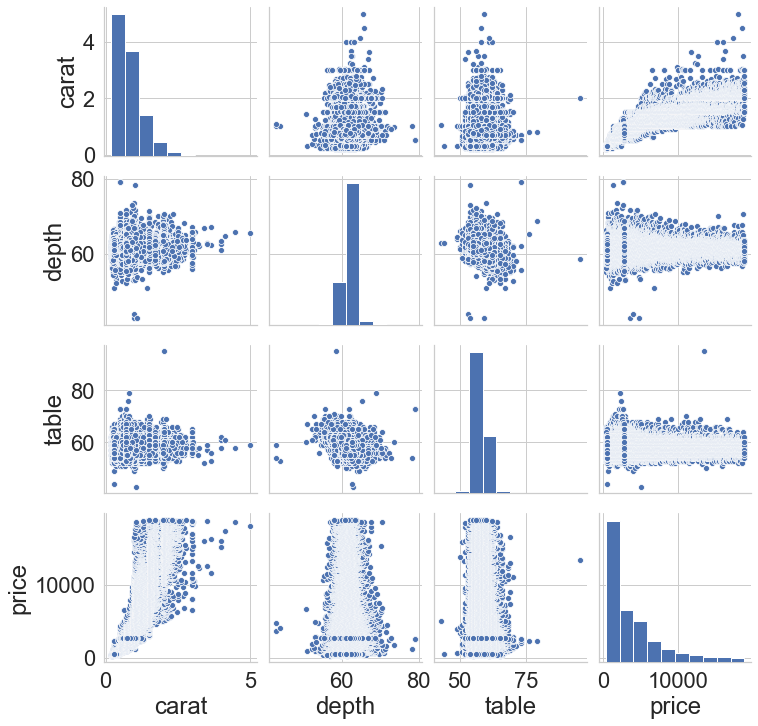

In [56]:
#plot out pairplot to see our variables against each other

sns.pairplot(df)
plt.show()

In [110]:
# dropping price outliers
top_q = df['price'].quantile(.975)
bottom_q = df['price'].quantile(.025)

df = df[df['price'] < top_q]
df = df[df['price'] > bottom_q]
df['price'].describe()

count    51225.000000
mean      3678.817940
std       3430.046446
min        479.000000
25%        984.000000
50%       2401.000000
75%       5147.000000
max      15618.000000
Name: price, dtype: float64

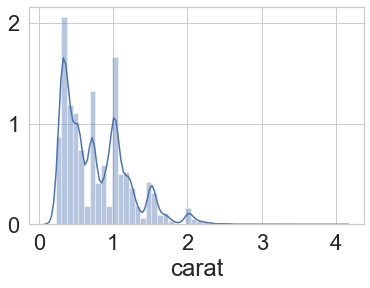

In [75]:
sns.distributions.distplot(df.carat)

In [111]:
# dropping price outliers
top_q = df['carat'].quantile(.99)
bottom_q = df['carat'].quantile(.01)

df = df[df['carat'] < top_q]
df = df[df['carat'] > bottom_q]
df['carat'].describe()

count    50035.00000
mean         0.77102
std          0.40631
min          0.27000
25%          0.41000
50%          0.70000
75%          1.02000
max          2.04000
Name: carat, dtype: float64

In [113]:
df= pd.read_csv('diamonds.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [112]:
without_outliers = df.groupby('cut')['price'].mean()
without_outliers

cut
Fair         3931.095863
Good         3696.384328
Ideal        3205.260656
Premium      4039.698275
Very Good    3818.984684
Name: price, dtype: float64

In [114]:
with_outliers = df.groupby('cut')['price'].mean()
with_outliers

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

## Testing Linear Regression Assumptions

### 1. Linearity between X variables and the Y variable (Diamond Price)

#### Linearity Carat vs. Price

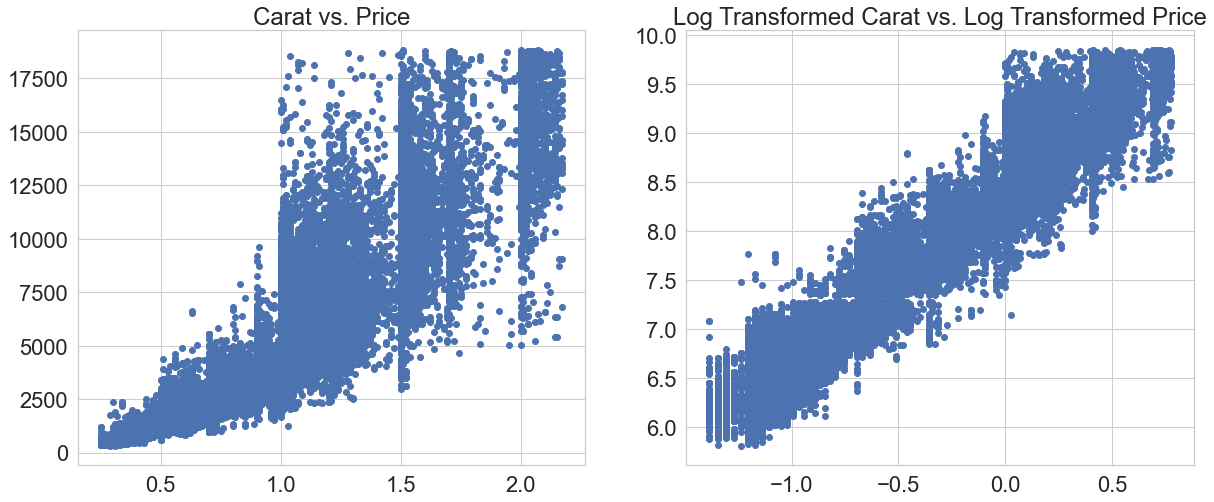

In [80]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Carat vs. Price')
plt.scatter(df.carat, df.price)

plt.subplot(1,2,2)
plt.title('Log Transformed Carat vs. Log Transformed Price')
plt.scatter(np.log(df.carat), np.log(df.price))

plt.show()

#### Linearity Depth vs. Price

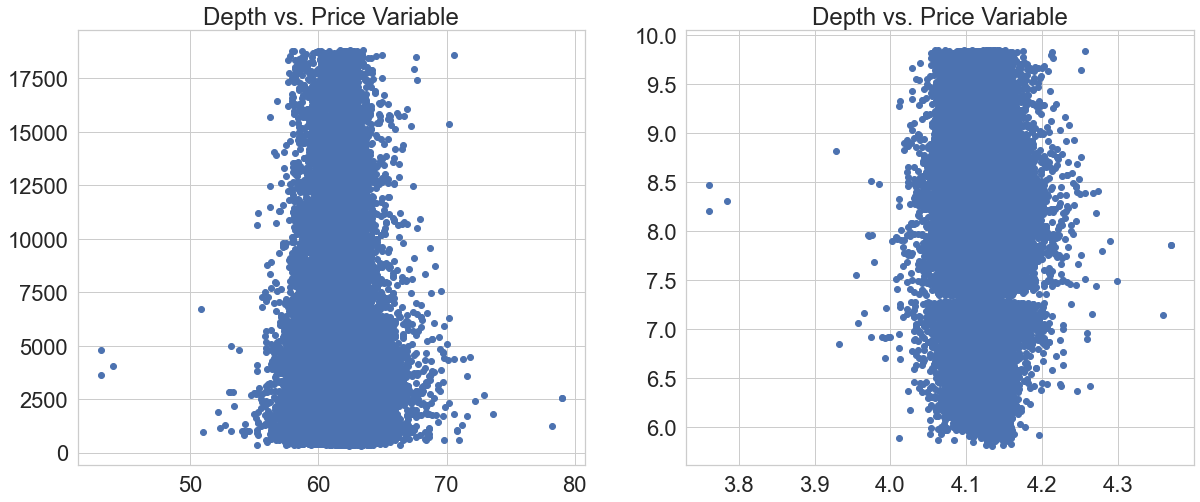

In [81]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Depth vs. Price Variable')
plt.scatter(df.depth, df.price)

plt.subplot(1,2,2)
plt.title('Depth vs. Price Variable')
plt.scatter(np.log(df.depth), np.log(df.price))

plt.show()

Inferences<br>
- there doesn't seem to be any relationship between depth and price because there is no correlation between. A change in depth doesn't signify a change in price.

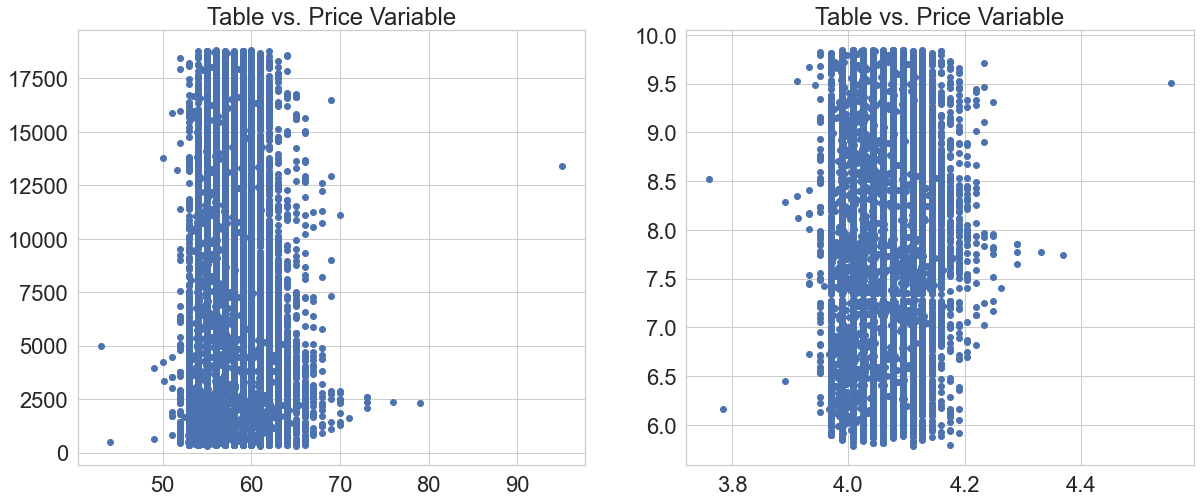

In [41]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Table vs. Price Variable')
plt.scatter(df.table, df.price)

plt.subplot(1,2,2)
plt.title('Table vs. Price Variable')
plt.scatter(np.log(df.table), np.log(df.price))

plt.show()

Inferences<br>
- there doesn't seem to be any relationship between table and price because there is no correlation between. A change in table doesn't signify a change in price.

In [ ]:
#cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)


In [ ]:
# maybe there are some ideal cut diamonds with low carat

In [127]:
with_outliers.reindex(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']).reset_index()

,cut,price
0,Fair,4358.757764
1,Good,3928.864452
2,Very Good,3981.759891
3,Premium,4584.257704
4,Ideal,3457.541970


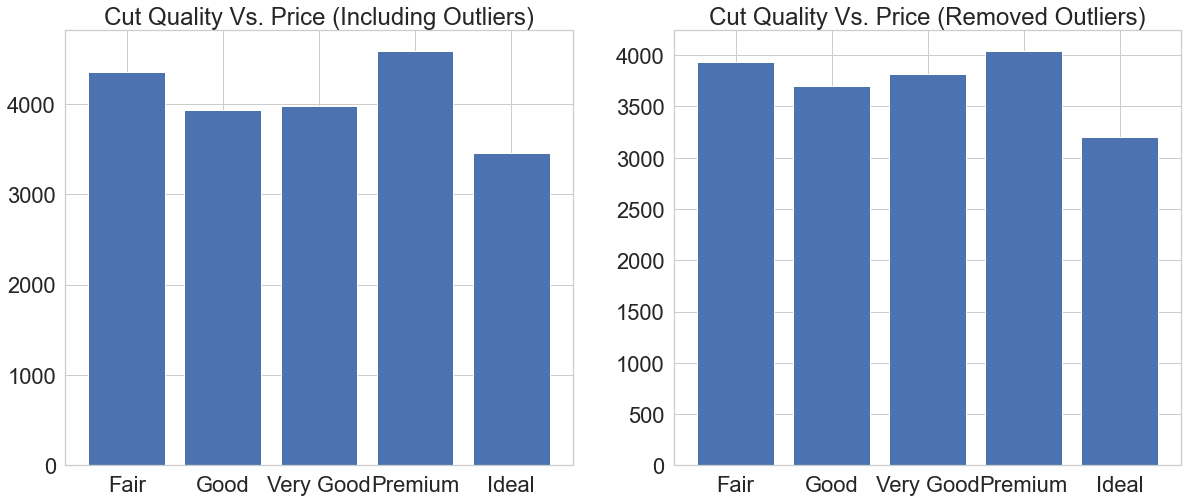

In [132]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Cut Quality Vs. Price (Including Outliers)')
plt.bar(with_outliers.reindex(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']).reset_index()['cut'], 
        with_outliers.reindex(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']).reset_index()['price'])

plt.subplot(1,2,2)
plt.title('Cut Quality Vs. Price (Removed Outliers)')
plt.bar(without_outliers.reindex(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']).reset_index()['cut'], 
        without_outliers.reindex(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']).reset_index()['price'])
plt.show()

Inferences <br>
- the cut doesn't seem to be a great predictor of price

### Forming Hypothesis Testing
Alternative Hypothesis : mu1 != m2 <br>
Null Hypothesis : mu1 == m2    <br>
mu1 = average price of logged 1 carat diamonds<br>
mu2 = average price of logged 2 carat diamonds

In [28]:
#no features cheating - data leakage